In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Number of unique values for each col
df.nunique()

name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       59
budget       413
gross       7472
company     2385
runtime      138
dtype: int64

In [6]:
# Removing continues data 
df = df.drop(labels =['released', 'company' ] , axis=1)

In [7]:
df.shape

(7668, 13)

In [8]:
df.head(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,98.0


In [9]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [10]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
runtime        4
dtype: int64

In [11]:
# Fill n/a values for numerical data with colomn mean 
df['score'].fillna(value=df['score'].mean() , inplace=True)
df['gross'].fillna(value=df['gross'].mean() , inplace=True)

# Fill n/a values for categorical data with 'unknown' word
df['rating'].fillna(value='unrated' , inplace=True)
df['writer'].fillna(value='unknown' , inplace=True)
df['star'].fillna(value='unknown' , inplace=True)
df['country'].fillna(value='unknown' , inplace=True)

# Delete lines with missing information 
df.dropna(subset=['votes'] , axis=0 , inplace=True)
df.dropna(subset=['budget'] , axis=0 , inplace=True)
df.dropna(subset=['runtime'] , axis=0 ,inplace=True)

In [12]:
# Check for duplicates
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df.shape

(5492, 13)

<AxesSubplot:xlabel='gross'>

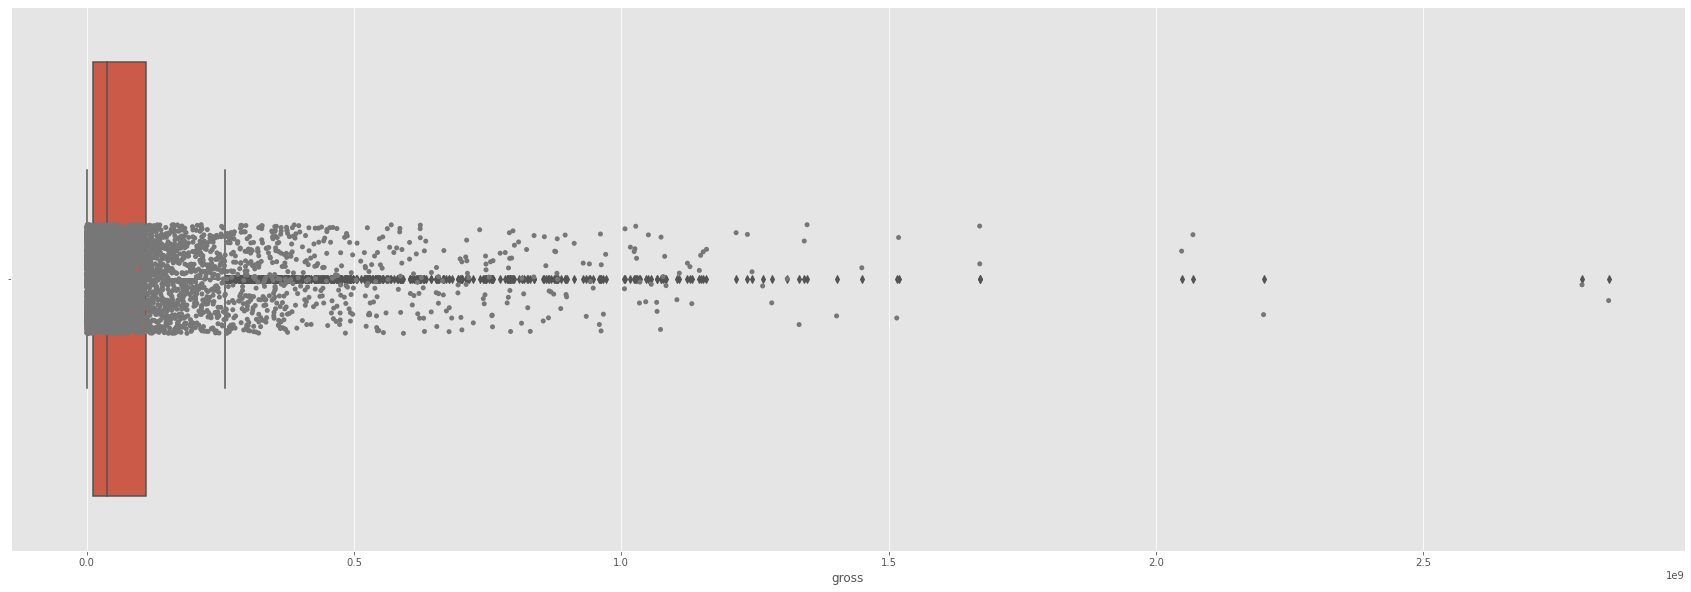

In [14]:
#Outliers detection for numerical variable 'gross'
plt.figure(figsize=(30,10))

sns.boxplot(x='gross' , data=df)
sns.stripplot( x='gross',data=df, color="#777777")

In [15]:
# Dropping gross values which is bigger than 2e9
outliers_indices = df.loc[df['gross']>2e9].index
df.drop(outliers_indices , inplace=True)

In [16]:
# Was (5492, 15)
df.shape

(5487, 13)

<AxesSubplot:xlabel='gross'>

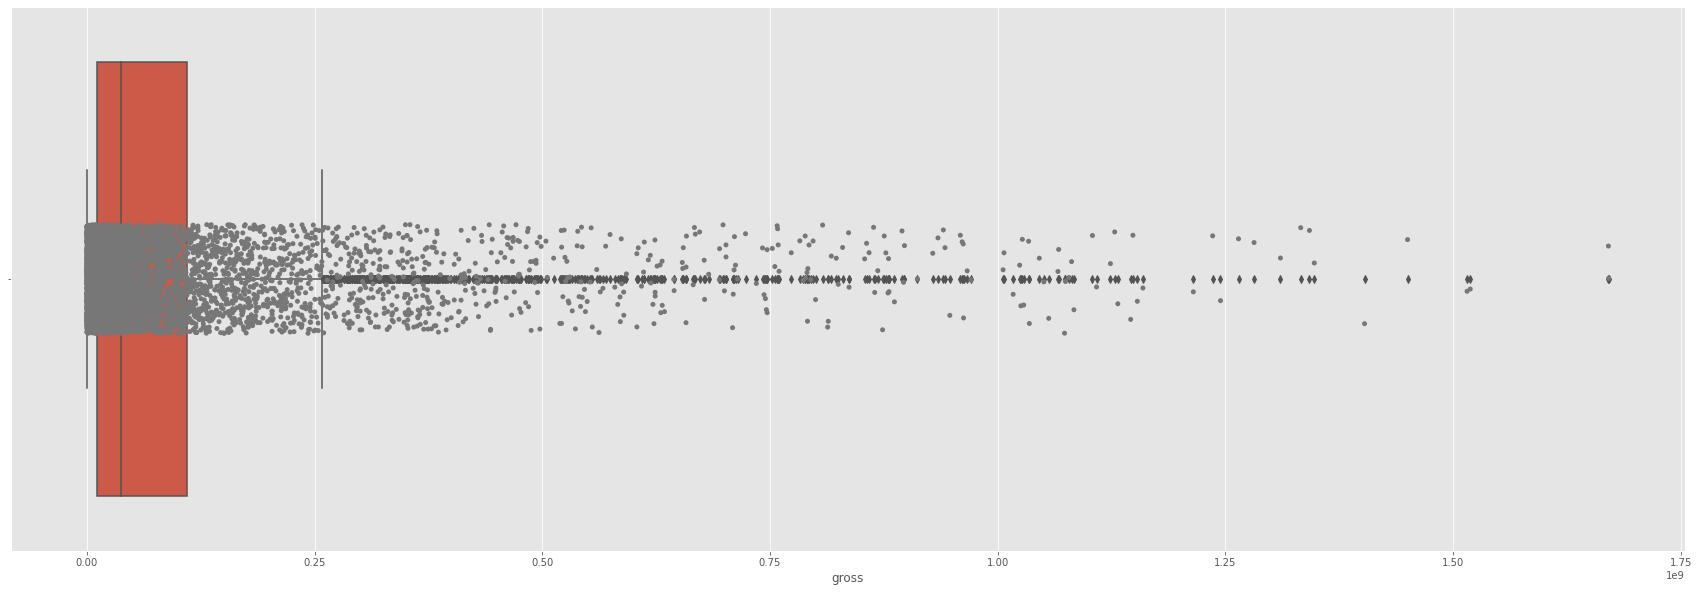

In [17]:
#Check again for gross
plt.figure(figsize=(30,10))
sns.boxplot(x='gross' , data=df)
sns.stripplot( x='gross',data=df, color="#777777")

In [18]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,98.0


<AxesSubplot:>

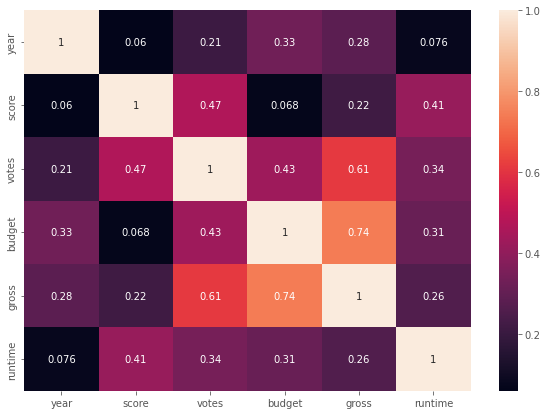

In [19]:
# Correlation between the variables
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True )

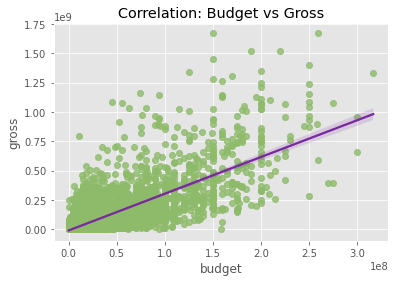

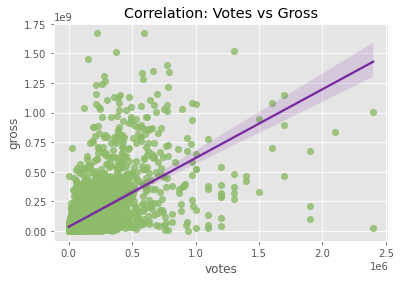

In [20]:
# Visualize correlations between budget and votes versus gross
sns.regplot(data=df, x='budget', y='gross', scatter_kws={"color": "#8dbb69"}, line_kws={"color": "#7928a1"}).set(title='Correlation: Budget vs Gross')
plt.show()

sns.regplot(data=df, x='votes', y='gross', scatter_kws={"color": "#8dbb69"}, line_kws={"color": "#7928a1"}).set(title='Correlation: Votes vs Gross')
plt.show()

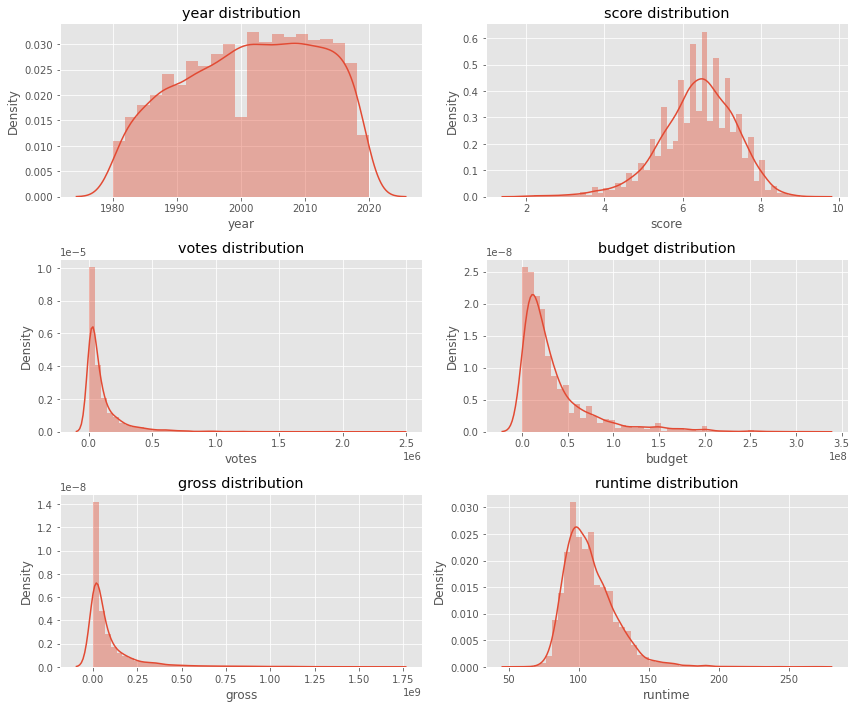

In [21]:
# Visualize the distribution of each variable.
plt.figure(figsize=(12,16))
for i, j in enumerate(df.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=df[j])
    plt.xlabel(j)
    plt.title('{} distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

In [22]:
# Keeping most recent values for columns 'director', 'writer', 'star'
df['director'].value_counts()

Woody Allen          33
Clint Eastwood       31
Steven Spielberg     27
Steven Soderbergh    23
Ron Howard           23
                     ..
Ellory Elkayem        1
Rudy De Luca          1
Donna Deitch          1
Burt Reynolds         1
Joseph Ebanks         1
Name: director, Length: 2106, dtype: int64

In [23]:
df['writer'].value_counts()

Woody Allen           32
Stephen King          29
John Hughes           20
Luc Besson            14
Joel Coen             13
                      ..
David Brin             1
Donald A. Wollheim     1
Tom Jankiewicz         1
Spice Girls            1
Joseph Ebanks          1
Name: writer, Length: 3259, dtype: int64

In [24]:
df['star'].value_counts()

Nicolas Cage         40
Tom Hanks            38
Robert De Niro       38
Tom Cruise           34
Bruce Willis         34
                     ..
Steven Soderbergh     1
Theresa Randle        1
David Schwimmer       1
Vincent D'Onofrio     1
Shannon Bond          1
Name: star, Length: 1893, dtype: int64

In [25]:
m1 = df.director.map(df.director.value_counts()) < 20
df.director =  df.director.mask(m1, 'other')

m2 = df.writer.map(df.writer.value_counts()) < 10
df.writer =  df.writer.mask(m2, 'other')

m3 = df.star.map(df.star.value_counts()) < 25
df.star =  df.star.mask(m3, 'other')

In [26]:
df.director.value_counts()

other                5307
Woody Allen            33
Clint Eastwood         31
Steven Spielberg       27
Ridley Scott           23
Ron Howard             23
Steven Soderbergh      23
Joel Schumacher        20
Name: director, dtype: int64

In [27]:
df.writer.value_counts()

other                  5272
Woody Allen              32
Stephen King             29
John Hughes              20
Luc Besson               14
Joel Coen                13
Wes Craven               12
David Mamet              11
Michael Crichton         11
Quentin Tarantino        11
Robert Rodriguez         11
M. Night Shyamalan       11
William Shakespeare      10
Kevin Smith              10
Ehren Kruger             10
Leigh Whannell           10
Name: writer, dtype: int64

In [28]:
df.star.value_counts()

other                    4946
Nicolas Cage               40
Tom Hanks                  38
Robert De Niro             38
Bruce Willis               34
Tom Cruise                 34
Denzel Washington          33
Sylvester Stallone         32
Johnny Depp                31
Adam Sandler               28
Eddie Murphy               27
Kevin Costner              27
Keanu Reeves               26
Harrison Ford              26
John Travolta              26
Arnold Schwarzenegger      26
Mel Gibson                 25
Matthew McConaughey        25
Matt Damon                 25
Name: star, dtype: int64

In [29]:
# Encoding 'rating', 'genre', 'country'
enc=OneHotEncoder()
enc_df=pd.DataFrame(enc.fit_transform(df[['rating', 'genre', 'country', 'director', 'writer', 'star']]).toarray())

In [30]:
final_df = df.join(enc_df)

In [31]:
final_df.isna().sum()

name         0
rating       0
genre        0
year         0
score        0
          ... 
118       1657
119       1657
120       1657
121       1657
122       1657
Length: 136, dtype: int64

In [32]:
# Dropping lines with NaN values, which appeared after merge (need to understand why)
final_df.dropna(axis=0, inplace=True)
final_df.drop(labels = ['rating', 'genre', 'country', 'director', 'writer', 'star'], axis=1, inplace=True)

In [33]:
final_df.head(10)

,name,year,score,votes,budget,gross,runtime,0,1,2,...,113,114,115,116,117,118,119,120,121,122
0,The Shining,1980,8.4,927000.0,19000000.0,46998772.0,146.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,The Blue Lagoon,1980,5.8,65000.0,4500000.0,58853106.0,104.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,1200000.0,18000000.0,538375067.0,124.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Airplane!,1980,7.7,221000.0,3500000.0,83453539.0,88.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Caddyshack,1980,7.3,108000.0,6000000.0,39846344.0,98.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,Friday the 13th,1980,6.4,123000.0,550000.0,39754601.0,95.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,The Blues Brothers,1980,7.9,188000.0,27000000.0,115229890.0,133.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,Raging Bull,1980,8.2,330000.0,18000000.0,23402427.0,129.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Superman II,1980,6.8,101000.0,54000000.0,108185706.0,127.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,The Long Riders,1980,7.0,10000.0,10000000.0,15795189.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
final_df.isna().sum()

name      0
year      0
score     0
votes     0
budget    0
         ..
118       0
119       0
120       0
121       0
122       0
Length: 130, dtype: int64

In [35]:
# Removing name 
# df = df.drop(labels =['name'] , axis=1)

In [37]:
final_df.nunique()

name      3808
year        30
score       72
votes      619
budget     331
          ... 
118          2
119          2
120          2
121          2
122          2
Length: 130, dtype: int64

In [40]:
df.to_csv("cleaned_data.csv", index=False)